id
bitcoin        1
ethereum       0
tether         0
binancecoin    0
usd-coin       0
              ..
frax-share     0
chiliz         0
sui            0
nexo           0
tominet        0
Name: cluster, Length: 100, dtype: int32
100


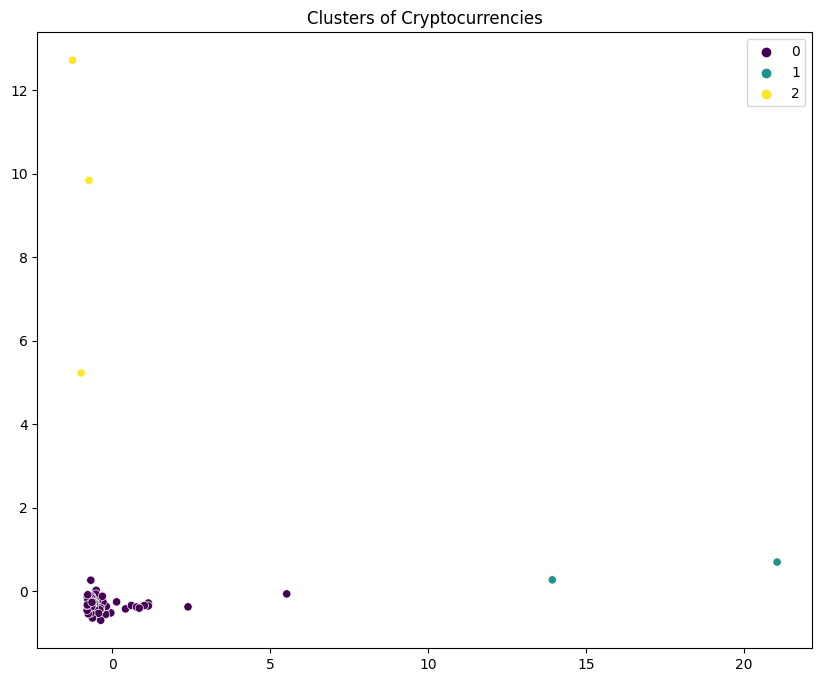

Silhouette Score:  0.9137774106270407


In [2]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Request data from the CoinGecko API
url = "https://api.coingecko.com/api/v3/coins/markets?vs_currency=usd"
response = requests.get(url)
data = response.json()

# Transform data into a pandas DataFrame
df = pd.DataFrame(data)
df.set_index('id', inplace=True)

# Keep only numeric data for clustering
df_numeric = df.select_dtypes(['number'])

# Handle missing data
df_numeric.fillna(value=0, inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)

# Reduce dimensionality for better visualization
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(pca_features)
df_numeric['cluster'] = kmeans.labels_

# Print out the result
print(df_numeric['cluster'])

print(len(df_numeric))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Visualization using PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title('Clusters of Cryptocurrencies')
plt.show()

# Evaluate the model using silhouette score
silhouette_avg = silhouette_score(pca_features, kmeans.labels_)
print("Silhouette Score: ", silhouette_avg)

In [19]:
# Create a DataFrame for cluster 1
df_cluster_1 = df_numeric[df_numeric['cluster'] == 0]

# Print the names of all the cryptocurrencies in cluster 1
print("Cryptocurrencies in cluster 0:")
for coin in df_cluster_1.index:
    print(coin)


Cryptocurrencies in cluster 0:
ethereum
tether
binancecoin
usd-coin
ripple
staked-ether
cardano
dogecoin
tron
solana
matic-network
polkadot
litecoin
binance-usd
dai
avalanche-2
leo-token
uniswap
chainlink
cosmos
monero
okb
stellar
the-open-network
ethereum-classic
true-usd
bitcoin-cash
internet-computer
lido-dao
filecoin
quant-network
hedera-hashgraph
crypto-com-chain
arbitrum
aptos
vechain
near
paxos-standard
frax
the-graph
apecoin
rocket-pool-eth
algorand
rocket-pool
aave
elrond-erd-2
eos
usdd
blockstack
optimism
the-sandbox
render-token
fantom
whitebit
tezos
bitget-token
theta-token
radix
immutable-x
decentraland
bitdao
kucoin-shares
havven
gemini-dollar
gatechain-token
axie-infinity
maker
curve-dao-token
neo
terra-luna
flow
gala
pax-gold
bitcoin-cash-sv
tether-gold
klay-token
xdce-crowd-sale
compound-ether
injective-protocol
kava
tokenize-xchange
casper-network
iota
huobi-token
compound-usd-coin
frax-ether
ecash
gmx
conflux-token
mina-protocol
frax-share
chiliz
sui
nexo
tominet
